In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df=pd.read_csv('bank.csv',sep=';'  )

In [113]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [114]:
df.shape

(4521, 17)

Understandig Data
model learns patterns from data. if we dont understand the data,we wont to able to understand the model


In [115]:
# target Variable
df['y'].value_counts()



y
no     4000
yes     521
Name: count, dtype: int64

1. mostly customers says NO
2. very few said yes
3. this will be later when we evaluate models


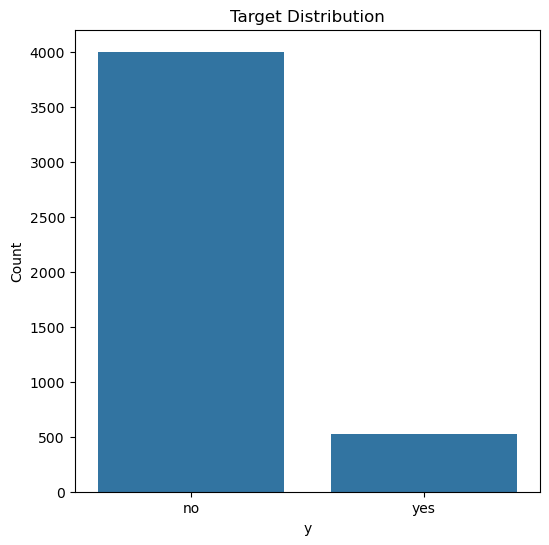

In [116]:
plt.figure(figsize=(6,6))
sns.countplot(x='y',data=df)
plt.title("Target Distribution")
plt.ylabel('Count')
plt.show()

In [117]:
num_cols=df.select_dtypes(include='int64').columns

In [118]:
num_cols
#there are numeric columns .we can plot them to understand spread and scale

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

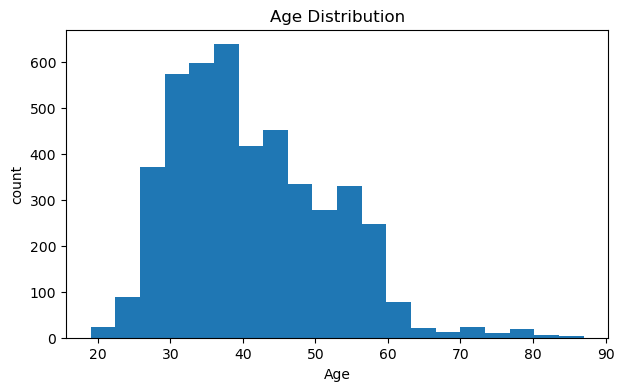

In [119]:
# age distrubution
plt.figure(figsize=(7,4))
plt.hist(df['age'],bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

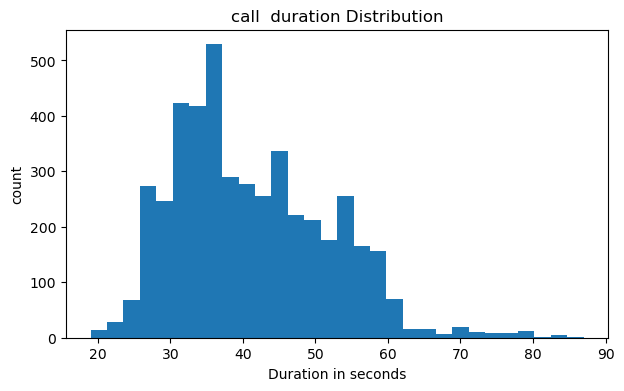

In [120]:
plt.figure(figsize=(7,4))
plt.hist(df['age'],bins=30)
plt.title('call  duration Distribution')
plt.xlabel('Duration in seconds')   
plt.ylabel('count')
plt.show()


1.feature are skewed
2.some have very large range
3. therfore scaling is needed

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

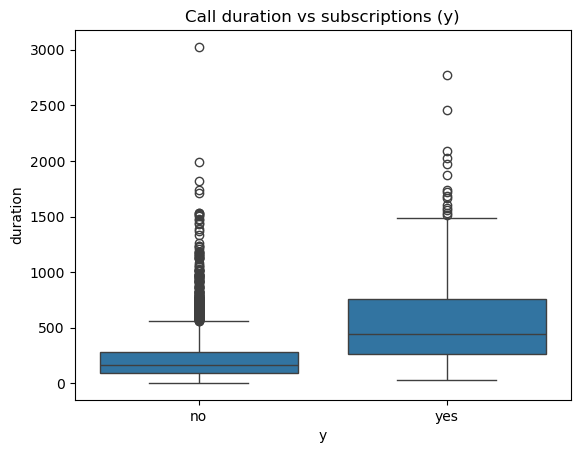

In [121]:
# Duration vs y(target)
sns.boxplot(x='y',y='duration',data=df )
plt.title('Call duration vs subscriptions (y)')
plt.xlable('Subcribed (y)')
plt.ylable('Duration')
plt.show()

Classification
1.seprate x(features) and y(target).



In [ ]:
x=df.drop('y',axis=1)
y=df['y']   

In [ ]:
x.shape

(4521, 16)

In [ ]:
y.shape

(4521,)

2.numeric and category column


In [ ]:
cat_cols=x.select_dtypes(include='object').columns
num_cols=x.select_dtypes(include='int64').columns

category:'Encoding'
numeric:scaling

3.Encoding

In [ ]:
x_encoded=pd.get_dummies(x,columns=cat_cols,drop_first=True)


In [ ]:
print("before encoding":, x.shape)

SyntaxError: invalid syntax (105008315.py, line 1)

In [ ]:
 print("after encoding:", x_encoded.shape)

after encoding: (4521, 42)


4.Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42,stratify=y)    

In [ ]:
print(x_train.shape,x_test.shape)

(3616, 42) (905, 42)


# 5 Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
# Making copies so that we dont mess up original data
x_train_scaled=x_train.copy()
x_test_scaled=x_test.copy()

In [ ]:
x_train_scaled[num_cols]=scaler.fit_transform(x_train[num_cols]) # fit on train numeric col only


In [ ]:
x_test_scaled[num_cols] = scaler.transform(x_test[num_cols]) 
# transform on test numeric col only

1 . Train data decides scaling rules
2. test data only follows those rules
3. no data leakage: the model accidently gets access to inform from the testing
while it is still learning

# 6. Train Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=500)
model.fit(x_train_scaled,y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


## 7 Prediction

In [ ]:
y_pred=model.predict(x_test_scaled)

# 8.Evalution
Accuracy+confused matrix+classifiction report

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy:", acc)

Accuracy: 0.887292817679558


In [ ]:
cm = confusion_matrix(y_test,y_pred,labels=['no','yes'])
cm


array([[797,   4],
       [ 98,   6]])

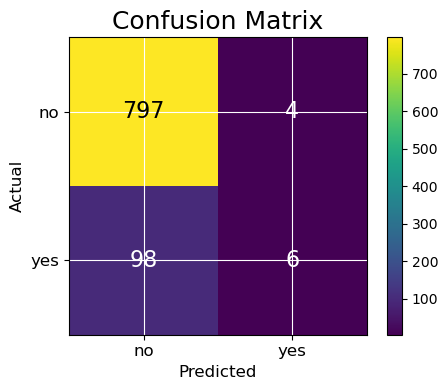

In [ ]:
plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title('Confusion Matrix',fontsize=18)
plt.xlabel('Predicted',fontsize=12)
plt.ylabel('Actual',fontsize=12)

plt.xticks([0,1],['no','yes'],fontsize=12)
plt.yticks([0,1],['no','yes'],fontsize=12)
plt.grid(False)
plt.gca().set_xticks([0,1])
plt.gca().set_yticks([0,1])
plt.grid(color='white',)

for i in range(2):
    for j in range(2):
        val=cm[i,j]
        if val>cm.max()/2:
            color='black'
        else:
            color='white'
        plt.text(j,i,val,ha='center',va='center',color=color,fontsize=16)
plt.colorbar()
plt.tight_layout()

rOWS =aCTUAL COLUMNS= =PREDICTED
1.TOP LEFT= CORRECT NO
2. BOTTOM RIGHT= CORRECT YES
3 . BOTTOM LEFT= MISSED YES
4. TOP RIGHT=FALES YES

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94       801
         yes       0.60      0.06      0.11       104

    accuracy                           0.89       905
   macro avg       0.75      0.53      0.52       905
weighted avg       0.86      0.89      0.84       905



total cust=500
100

# imporve ** YES ** class Performance
from confusion matrix
- false negative=70
- true positive=30
our model is missing many customers who would 
actually subscribed. so we want our model to 
identify more yes customers


In [125]:
y_prob = model.predict_proba(x_test_scaled)
y_prob[:5]

array([[0.88869793, 0.11130207],
       [0.98083289, 0.01916711],
       [0.92260943, 0.07739057],
       [0.98864341, 0.01135659],
       [0.9871389 , 0.0128611 ]])

In [ ]:
y_yes_prob=y_prob[:,1]
# this col tell  us how confident the  model is that customer will say yes

In [127]:
y_pred_default= model.predict(x_test_scaled)

In [128]:
threshold=0.30
y_pred_30=[]
for prob in y_yes_prob:
    if prob>=threshold:
        y_pred_30.append('yes')
    else:
        y_pred_30.append('no')

In [129]:
cm_30=confusion_matrix(y_test,y_pred_30,labels=['no','yes'])
cm_30

array([[793,   8],
       [ 91,  13]])

([<matplotlib.axis.YTick at 0x1bb23ee1950>,
 [Text(0, 0, 'no'), Text(0, 1, 'yes')])

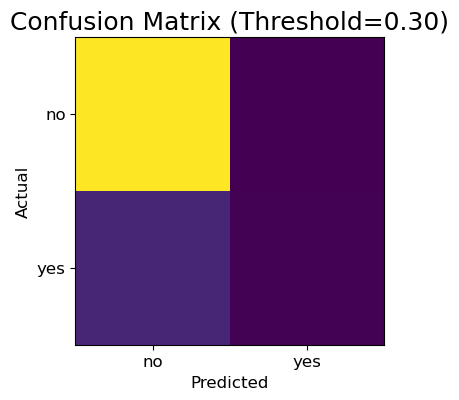

In [130]:
plt.figure(figsize=(5,4))
plt.imshow(cm_30)
plt.title('Confusion Matrix (Threshold=0.30)',fontsize=18)
plt.xlabel('Predicted',fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.xticks([0,1],['no','yes'],fontsize=12)
plt.yticks([0,1],['no','yes'],fontsize=12)
